In [36]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from scipy import integrate
import seaborn as sns
import math
from datetime import datetime
import matplotlib.gridspec as gridspec

In [2]:
os.chdir('D:\\Moji fajlovi\\Master\\prog\\Project 5 - Agriculture Data Analysis')

In [3]:
data = pd.read_csv('database_biosense.csv',header=0, delimiter=';',skiprows=1)
data.head()

,Parcel,Area,Year,Crop,Seed production,Variety,Previous crop,Seed units,Manure,Fertiliser amount,...,Irrigation,Harvest,Seed,Fertiliser,Pesticide,Yield,Price,Revenue,Planting date,Harvest date
0,G-1/1,"63,38",2018,Maize,0,NS 205,Maize,184,0,"237,719575",...,9000,"11853,74",9450,"5037,277795","15202,25308","7,811454718","14,4","112484,9479",15.6.2018,15.10.2018
1,G-1/2,"23,01",2018,Barley,0,Salamandre,Maize,46,0,"238,6363636",...,0,"11762,74","8594,30605","7079,225979",1435,"7,146352313","15,8","112912,3665",28.9.2017,5.6.2018
2,G-2/1,"94,88",2018,Soybean,0,Gorstak,Maize,"100,33",0,"214,6331148",...,9000,"11549,5","10191,21689","7146,257137","11843,41404","3,388877141","37,35","126574,5612",19.4.2018,13.9.2018
3,G-2/2,"20,59",2018,Soybean,0,Wendy,Maize,"93,15",0,"140,8450704",...,0,"11571,08","5428,848956","4776,056338","12594,37882","3,71296746","37,35","138679,3346",17.4.2018,14.9.2018
4,G-3/1,"63,62",2018,Maize,0,DKC 5830,Wheat,60,"1,886199308","474,6934926",...,9000,"12801,04","19899,77051","19745,51399","4947,696479","14,60232631","14,4","210273,4989",17.4.2018,14.9.2018


In [4]:
data.isnull().any()

Parcel                    False
Area                      False
Year                      False
Crop                      False
Seed production           False
Variety                    True
Previous crop              True
Seed units                 True
Manure                    False
Fertiliser amount         False
Pesticide amount          False
Tillage                   False
Sowing                    False
Fertiliser application    False
Pesticide application     False
Irrigation                False
Harvest                   False
Seed                      False
Fertiliser                False
Pesticide                 False
Yield                     False
Price                     False
Revenue                   False
Planting date              True
Harvest date               True
dtype: bool

In [5]:
data.fillna({'Variety':'None','Previous crop': 'None', 'Seed units': '0'}, inplace=True)

In [6]:
convert_todot = lambda x: float(x.replace(',','.'))

In [7]:
data['Area'] = data['Area'].apply(convert_todot)

In [8]:
for i in list(data)[7:23]:
    try:
        data[i] = data[i].apply(convert_todot)
    except ValueError:
        continue

In [9]:
drop = data['Planting date'].dropna()
i1 = list(drop.index.values)
dfdates = data.loc[i1]

In [10]:
drop2 = dfdates['Harvest date'].dropna()
i2 = list(drop2.index.values)
dfdates = dfdates.loc[i2]

In [11]:
convert_date = lambda x: datetime.strptime(str(x), '%d.%m.%Y')

In [12]:
dfdates['Planting date'] = dfdates['Planting date'].apply(convert_date)
dfdates['Harvest date'] = dfdates['Harvest date'].apply(convert_date)

In [13]:
crops = list(data['Crop'].unique())
crops

['Maize',
 'Barley',
 'Soybean',
 'Wheat',
 'Sunflower',
 'Oilseed rape',
 '2nd soybean']

In [14]:
n = len(crops)

In [ ]:
def plot_ph_date(dfdates,i):
    crop = list(dfdates['Crop'].unique())
    fig = plt.figure(figsize=(15,8))
    gs = gridspec.GridSpec(2,2)
    df = dfdates[dfdates['Crop']==crop[i]]
    
    ax1 = fig.add_subplot(gs[0,:])
    ax1.hist(df['Planting date'],color='darkgreen')
    ax1.hist(df['Harvest date'],color='darkorange')
    ax1.set_ylabel('counts',fontsize=16,fontstyle='italic')
    ax1.legend()
    ax1.grid(axis='y',color='lightgrey',alpha=0.5)
    
    dates = ['Planting date','Harvest date']
    for j in range(2):
        index = []
        for k in df[dates[j]].index.values:
            if df.loc[k,dates[j]].year == 2017:
                index.append(k)
        ph_dates = df[dates[j]].loc[index]
        ax = fig.add_subplot(gs[1,j])
        ax.hist(ph_dates.values,color='darkgreen')
        ax.set_title('Distribution of '+dates[j]+' for 2017. year')
        ax.set_ylabel('counts',fontsize=10,fontstyle='italic')
        ax.set_xlabel(dates[j], fontsize=10,fontstyle='italic')
        ax.grid(axis='y',color='lightgrey',alpha=0.5)
        for tick in ax.get_xticklabels():
            tick.set_rotation(55)
    
    fig.align_labels()
    fig.suptitle(crop[i], fontsize = 20, y=0.99)
    fig.tight_layout()
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.3, wspace=0.35)
    plt.show()

In [ ]:
plot_ph_date(dfdates,0)

In [ ]:
for i in range(n):
    plot_ph_date(dfdates,i)

In [ ]:
def plot_yield(data,i):
    crop = list(data['Crop'].unique())
    
    df2 = data[data['Crop']==crop[i]]
    
    df16 = df2[df2['Year'] == 2016]
    std16 = np.std(df16['Yield'])
    df17 = df2[df2['Year'] == 2017]
    std17 = np.std(df17['Yield'])
    df18 = df2[df2['Year'] == 2018]
    std18 = np.std(df18['Yield'])    
    
    box_line_col = []
    if df16.shape[0] <= 2:
        df2 = df2.query('Year == 2017 or Year == 2018')
        box_line_col = ['steelblue','darkorange']
    if df17.shape[0] <= 2:
        df2 = df2.query('Year == 2016 or Year == 2018')
        box_line_col = ['steelblue','darkorange']
        if df16.shape[0] <= 2:
            box_line_col = ['steelblue']
            
    if df18.shape[0] <= 2:
        df2 = df2.query('Year == 2017 or Year == 2016')
        box_line_col = ['steelblue','darkgreen']
        if df17.shape[0] <= 2:
            box_line_col = ['darkorange']
    
    if df2.shape[0] <= 2:
        print('A little bit of data! Please expand your database')
    else:
        fig2 = plt.figure(figsize=(10,5))
        ax = fig2.add_subplot(1,1,1)
        palette = ["lightsteelblue", "navajowhite", "lightgreen"]
        sns.boxplot(x='Year',y='Yield',data=df2,palette=palette)
        ax.grid(axis='y',color='darkgray')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_color('darkgray')
    
    
    
        for j,col in enumerate(box_line_col):
            mybox = ax.artists[j]
            mybox.set_edgecolor(col)
            for k in range(j*6,j*6+6):
                line = ax.lines[k]
                line.set_color(col)
                line.set_mfc(col)
                line.set_mec(col)
    
        text = '\n'.join(('Variability of yield:',"\u2022 std 2016: "+str(round(std16,2)), '\u2022 std 2017: '+str(round(std17,2)),
                      '\u2022 std 2018: '+str(round(std18,2))))
        props = dict(boxstyle='round',facecolor='white', edgecolor='darkgreen', alpha=0.5,pad=0.5)
        plt.figtext(0.99, 0.4,text,family='sans-serif', color='k', fontsize=12, bbox=props)
    
        fig2.tight_layout()
        fig2.suptitle(crop[i],fontsize=20,fontweight=5)
        plt.show()

In [ ]:
plot_yield(data,6)

In [ ]:
for i in range(n):
    plot_yield(data,i)

In [ ]:
text = {}
for i in range(n): 
    fig = plt.figure(figsize=(10,5))
    ax = fig2.add_subplot(1,1,1)
    df3 = data[data['Crop']==crop[i]]
    
    
    k = df3['Variety'].value_counts()
    
        
text

In [30]:
def func(pct, allvals):
    percent = float((100*pct)/allvals.sum())
    return "{:.2f}%".format(pct,percent)

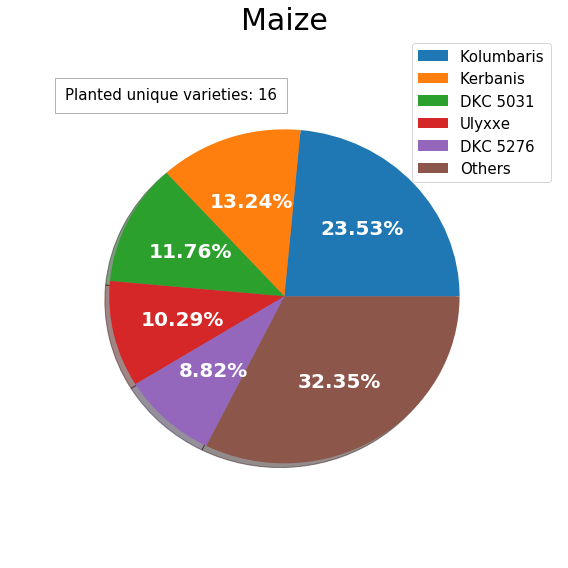

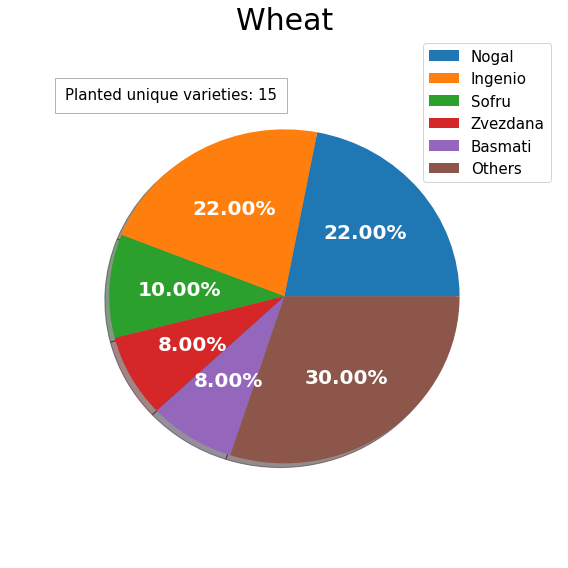

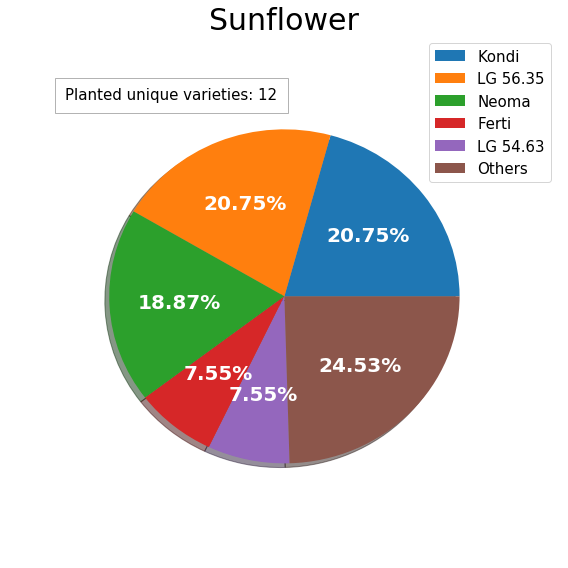

In [31]:
for i in range(n):
    
    df5 = data[data['Crop'] == crops[i]]
    length = len(df5['Variety'].unique())
    
    if length>4:
        fig5 = plt.figure(figsize=(8,8))
        ax5 = fig5.add_subplot(111)
    
        vc = df5['Variety'].value_counts()
        sort = vc.sort_values(ascending=False)
        ssum = sort.sum()
        pie = sort.iloc[:5]
        pie = pie.append(pd.Series([ssum-pie.sum()],index=['Others']))
        
        wedges, texts, autotexts = ax5.pie(x=pie, labels=list(pie.index.values),autopct=lambda pct: func(pct, pie),radius=0.8,shadow=True, textprops=dict(color="w"))
        plt.setp(autotexts,fontsize=20,fontweight='bold', color='w')
        
        ax5.set_title(crops[i],fontdict={'fontsize': 30, 'fontweight': 'medium', 'color': 'k'})
        ax5.legend(loc=1,fontsize=15)
    
        props = dict(facecolor='white',edgecolor='dimgrey',alpha=0.5,pad=10)
        text = 'Planted unique varieties: '+str(length)
        ax5.text(-1,1,text,bbox=props,fontsize=15,va='top', ha='left')

        ax5.axis('off')
    
    
        fig5.tight_layout()
plt.show()

In [33]:
pivot = data[['Crop','Previous crop']].pivot_table(index='Previous crop', columns='Crop',aggfunc=len,fill_value=0,margins=True)
pivot

Crop,2nd soybean,Barley,Maize,Oilseed rape,Soybean,Sunflower,Wheat,All
Previous crop,,,,,,,,
Maize,0,1,1,0,10,8,15,35
None,0,1,30,0,6,38,19,94
Oilseed rape,0,0,0,0,0,0,1,1
Soybean,0,0,12,0,0,0,0,12
Sunflower,0,0,9,0,0,0,15,24
Wheat,1,0,16,5,2,7,0,31
All,1,2,68,5,18,53,50,197


In [53]:
chi2 = stats.chi2_contingency(pivot)
chi2

(129.26015449260603,
 8.143347636363078e-11,
 42,
 array([[1.77664975e-01, 3.55329949e-01, 1.20812183e+01, 8.88324873e-01,
         3.19796954e+00, 9.41624365e+00, 8.88324873e+00, 3.50000000e+01],
        [4.77157360e-01, 9.54314721e-01, 3.24467005e+01, 2.38578680e+00,
         8.58883249e+00, 2.52893401e+01, 2.38578680e+01, 9.40000000e+01],
        [5.07614213e-03, 1.01522843e-02, 3.45177665e-01, 2.53807107e-02,
         9.13705584e-02, 2.69035533e-01, 2.53807107e-01, 1.00000000e+00],
        [6.09137056e-02, 1.21827411e-01, 4.14213198e+00, 3.04568528e-01,
         1.09644670e+00, 3.22842640e+00, 3.04568528e+00, 1.20000000e+01],
        [1.21827411e-01, 2.43654822e-01, 8.28426396e+00, 6.09137056e-01,
         2.19289340e+00, 6.45685279e+00, 6.09137056e+00, 2.40000000e+01],
        [1.57360406e-01, 3.14720812e-01, 1.07005076e+01, 7.86802030e-01,
         2.83248731e+00, 8.34010152e+00, 7.86802030e+00, 3.10000000e+01],
        [1.00000000e+00, 2.00000000e+00, 6.80000000e+01, 5.00000000e

In [86]:
def cdf(x,q):
    return 1/(math.pow(2,q/2)*math.gamma(q/2))*math.pow(x,q/2-1)*math.pow(math.e,-x/2)
def cdf_array(x,q):
    l = []
    for i in x:
        l.append(float(cdf(i,q)))
    return np.array(l)

In [90]:
stats.chi2.ppf(0.01,chi2[2])

23.6500946778262

ValueError: setting an array element with a sequence.

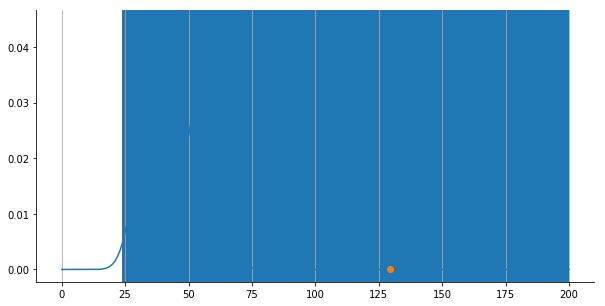

In [93]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

x = np.linspace(0,200,200)
sns.lineplot(x,cdf_array(x,chi2[2]))

ax.grid(axis='x',color='darkgray')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.plot([chi2[0]], [cdf(chi2[0],chi2[2])], 'o')
ax.axvspan(stats.chi2.ppf(0.01,chi2[2]),200)
ax.axhspan(0,cdf_array(x,chi2[2]))
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),arrowprops=dict(facecolor='black', shrink=0.05))

fig.tight_layout()
fig.suptitle('Chi-squared distribution (q = '+str(chi2[2])+') for Previous crop-Crop',fontsize=20,x=0.5,y=1.2,fontweight=5)
plt.show()

In [ ]:
if chi2[1] <= 0.01:
    print('Previous crop and Crop attribute are dependent at level confidence 0.01.')
elif chi2[1] <= 0.05:
    print('Previous crop and Crop attribute are dependent at level confidence 0.05.')
else:
    print('Previous crop and Crop attribute are independent.')

In [ ]:
dfdates['Duration of season (days)'] = dfdates['Harvest date']-dfdates['Planting date']

In [ ]:
dfdates['Duration of season (days)'] = dfdates['Duration of season (days)'].apply(lambda x: float(x.days))
dfdates

In [ ]:
def corr(y):    
    Z = {}  #for centered attributes vectors
    for j in list(y):
        mean = y[j].sum()*(1/y[j].shape[0])
        Z[j] = [i - mean for i in y[j]] #centered vector for attribute j
        
    df_dic = {' ': list(y)}
    for j in list(y):
        Zj = np.array(Z[j])
        df_list = []
        for i in list(y):
            Zi = np.array(Z[i])
            norm_Zj = np.linalg.norm(Zj,2)
            norm_Zi = np.linalg.norm(Zi,2)
            df_list.append(np.dot(np.transpose(Zj/norm_Zj),Zi/norm_Zi)) #corr = cos(teta) for every two attributes i and j
        df_dic[j] = df_list #correlations for attribute j relative to all attributes (include corr for j,j) 
    columns = list(df_dic.keys())
    sigmaCorr = pd.DataFrame(df_dic, columns = columns)
    sigmaCorr = sigmaCorr.set_index(' ')
    sns.set(font_scale=1, rc={"figure.figsize": (5, 5)})
    sns.heatmap(sigmaCorr, square=True)
    plt.title('Heat map for correlation', fontsize='20')
    return sigmaCorr

In [ ]:
corr_list = ['Yield','Seed','Fertiliser','Pesticide','Duration of season (days)']

In [ ]:
dfcorr = dfdates[corr_list]
for i in corr_list:
    for j in dfcorr[i].index.values:
        if dfcorr.loc[j,i] == 0:
            dfcorr = dfcorr.drop(j,axis=0)

In [ ]:
dfcorr.dtypes

In [ ]:
corr(dfcorr)

In [ ]:
costs = list(data)[11:20]
costs

In [ ]:
dfcosts = data[costs]
for i in dfcosts['Pesticide application'].index.values:
    try:
        float(dfcosts.loc[i,'Pesticide application'].replace(',','.'))
    except ValueError:
        dfcosts = dfcosts.drop(i,axis=0)
dfcosts['Pesticide application'] = dfcosts['Pesticide application'].apply(convert_todot)

In [ ]:
data['Profit'] = data['Revenue'] - dfcosts.sum(axis=1)

In [ ]:
sort = data['Profit'].sort_values(ascending=False)

In [ ]:
parcel = []
crop_list = []
area = []
profit = []
for i in sort[:5].index.values:
    profit += [round(sort.loc[i],2)]
    parcel += [data.loc[i,'Parcel']]
    crop_list += [data.loc[i,'Crop']]
    area += [data.loc[i,'Area']]
d = {'Parcel': parcel,'Area (ha)': area,'Crop': crop_list,'Profit (RSD/ha)': profit}
top5 = pd.DataFrame(d,columns=['Parcel','Area (ha)','Crop','Profit (RSD/ha)'])
top5

In [ ]:
grouped_profit = data['Profit'].groupby(data['Crop'])
profit_mean = grouped_profit.mean()
profit_mean

In [ ]:
#fig6 = plt.figure(figsize=(15,15))
sns.catplot(data=data,x='Year',y='Profit',col='Crop',kind='strip')

In [ ]:
sorted_profit = profit_mean.sort_values(ascending=False)
sorted_profit

In [ ]:
grouped_fp = data[['Fertiliser amount','Pesticide amount']].groupby(data['Crop'])
fp_mean = grouped_fp.mean()
fp_mean

In [ ]:
ranked_f = fp_mean.sort_values(by=['Fertiliser amount'],ascending=False)
ranked_f

In [ ]:
ranked_p = fp_mean.sort_values(by=['Pesticide amount'],ascending=False)
ranked_p

In [ ]:
grouped_fp_byvar = data[['Fertiliser amount','Pesticide amount']].groupby(data['Variety'])
fp_byvar_mean = grouped_fp_byvar.mean()
fp_byvar_mean

In [ ]:
top3_var = fp_byvar_mean.sort_values(by=['Pesticide amount'],ascending=True)[:3]
top3_var

In [ ]:
top3_var_f = fp_byvar_mean.sort_values(by=['Fertiliser amount'],ascending=True)[:3]
top3_var_f